In [2]:
# Import necessary libraries
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#uploaded = files.upload()

In [4]:
file_path = "/content/region_10-2.csv"
df = pd.read_csv(file_path, low_memory=False)
df.tail()

eventid  iyear  imonth  iday           approxdate  extended  \
58247  202012310007   2020      12    31                  NaN         0   
58248  202012310009   2020      12    31                  NaN         0   
58249  202012310013   2020      12    31                  NaN         0   
58250  202012310015   2020      12    31  2020-12-31 00:00:00         0   
58251  202012310016   2020      12    31  2020-12-31 00:00:00         0   

      resolution  country country_txt  region  ... addnotes  \
58247        NaN       95        Iraq      10  ...      NaN   
58248        NaN       95        Iraq      10  ...      NaN   
58249        NaN      228       Yemen      10  ...      NaN   
58250        NaN      228       Yemen      10  ...      NaN   
58251        NaN      228       Yemen      10  ...      NaN   

                                                  scite1  \
58247  "Bomb reportedly targets US-led coalition conv...   
58248  "Iraq experts work to defuse mine on oil tanke...   
58249  "Yemen: Bomb targets humanitarian group in Ade...   
58250  "Al Houthi militia escalated in Hays and targe...   
58251  "Al Houthi militia escalated in Hays and targe...   

                                                  scite2  \
58247  "Iraq tightens security in Green Zone amid ‘an...   
58248  "UPDATE 1-Iraq evacuates oil tanker after mine...   
58249  "Blast reported at headquarters of French NGO ...   
58250                                                NaN   
58251                                                NaN   

                                                  scite3  \
58247  "Bomb blast targets US-led coalition military ...   
58248  "Iraq defuses mine attached to Iraqi oil tanke...   
58249                                                NaN   
58250                                                NaN   
58251                                                NaN   

                       dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
58247  START Primary Collection       -9        -9        1       1      NaN  
58248  START Primary Collection       -9        -9        0      -9      NaN  
58249  START Primary Collection       -9        -9        1       1      NaN  
58250  START Primary Collection        0         0        0       0      NaN  
58251  START Primary Collection        0         0        0       0      NaN  

[5 rows x 135 columns]

In [5]:
df.shape

(58252, 135)

In [6]:
#Df which has only columns - eventid, iyear, imonth, iday, country_txt, region_txt, city, latitude, longitude, attacktype1_txt, nkill, nwound

selected_columns = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'nkill', 'nwound']
dff = df[selected_columns]
dff.head()

eventid  iyear  imonth  iday country_txt                  region_txt  \
0  197002280001   1970       2    28      Jordan  Middle East & North Africa   
1  197003140002   1970       3    14       Egypt  Middle East & North Africa   
2  197003290002   1970       3    29     Lebanon  Middle East & North Africa   
3  197004150001   1970       4    15      Jordan  Middle East & North Africa   
4  197004250001   1970       4    25      Turkey  Middle East & North Africa   

         city   latitude  longitude    attacktype1_txt  nkill  nwound  
0      Hebron  31.530243  35.094162      Armed Assault    NaN     NaN  
1  Alexandria  31.198056  29.919167  Bombing/Explosion    0.0     2.0  
2      Beirut  33.888523  35.503513  Bombing/Explosion    0.0     0.0  
3       Amman  31.950001  35.933331  Bombing/Explosion    0.0     0.0  
4    Istanbul  41.106178  28.689863  Bombing/Explosion    0.0     0.0

In [7]:
dff.shape

(58252, 12)

#Data Cleaning: EDA

In [8]:
#checking for null values
dff.isna().sum()

eventid               0
iyear                 0
imonth                0
iday                  0
country_txt           0
region_txt            0
city                 29
latitude            974
longitude           974
attacktype1_txt       0
nkill              3129
nwound             4710
dtype: int64

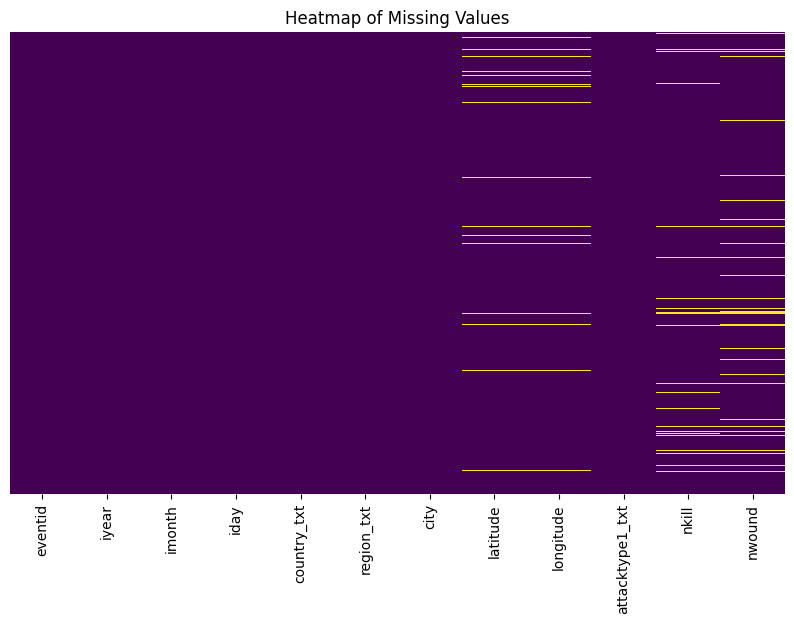

In [9]:
# Plot heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(dff.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

**Clean the data by removing rows with missing latitude or longitude.**

In [10]:
# remove rows with missing latitude or longitude.
dff_clr = dff.copy()
dff_clr = dff_clr.dropna(subset=['latitude', 'longitude'])

print('Before Dropping: ',dff.shape)
print('After Dropping: ',dff_clr.shape)

Before Dropping:  (58252, 12)
After Dropping:  (57278, 12)


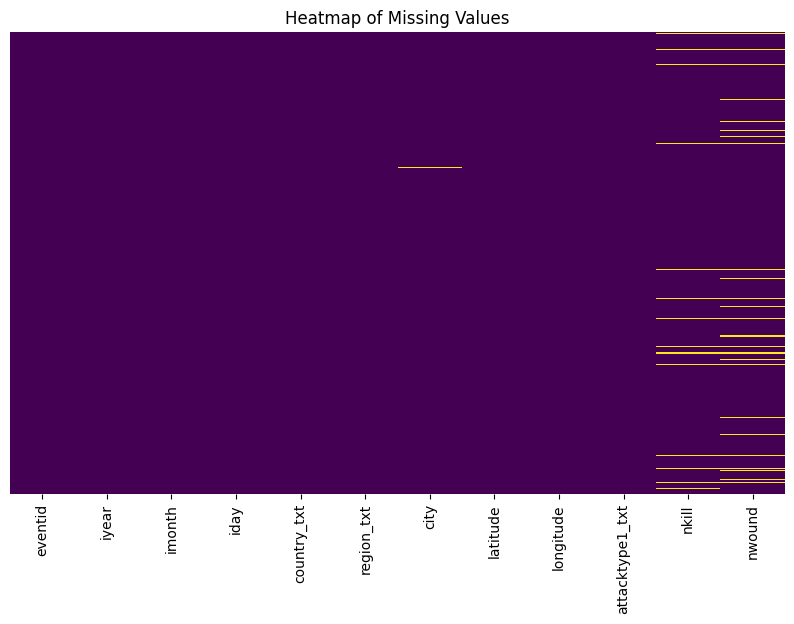

In [11]:
# Plot heatmap of null values after dropping above rows
plt.figure(figsize=(10, 6))
sns.heatmap(dff_clr.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [12]:
dff_clr.isna().sum()

eventid               0
iyear                 0
imonth                0
iday                  0
country_txt           0
region_txt            0
city                 27
latitude              0
longitude             0
attacktype1_txt       0
nkill              3037
nwound             4597
dtype: int64

In [13]:
dff = dff_clr.copy()
dff.tail()

eventid  iyear  imonth  iday country_txt  \
58246  202012300013   2020      12    30       Egypt   
58247  202012310007   2020      12    31        Iraq   
58249  202012310013   2020      12    31       Yemen   
58250  202012310015   2020      12    31       Yemen   
58251  202012310016   2020      12    31       Yemen   

                       region_txt          city   latitude  longitude  \
58246  Middle East & North Africa         Rafah  31.250196  34.241281   
58247  Middle East & North Africa     Yusufiyah  33.078350  44.254721   
58249  Middle East & North Africa          Aden  12.849085  45.037275   
58250  Middle East & North Africa         Sabaa  15.305307  43.019490   
58251  Middle East & North Africa  Beit Maghari  13.931337  43.478924   

         attacktype1_txt  nkill  nwound  
58246  Bombing/Explosion    1.0     3.0  
58247  Bombing/Explosion    0.0     0.0  
58249  Bombing/Explosion    0.0     0.0  
58250  Bombing/Explosion    NaN     NaN  
58251  Bombing/Explosion    NaN     NaN

In [14]:
dff[dff['city'].isnull()][['city', 'longitude', 'latitude']]

city  longitude   latitude
13265  NaN   6.088981  36.655192
15549  NaN  45.149450  33.773349
15772  NaN   3.702900  36.767596
15773  NaN   3.702900  36.767596
15962  NaN   3.702900  36.767596
16166  NaN  45.149450  33.773349
16452  NaN  45.149450  33.773349
16482  NaN  47.136212  31.873400
16596  NaN  45.752098  32.602409
16607  NaN  45.149450  33.773349
16684  NaN  43.483738  34.533753
16705  NaN  45.752098  32.602409
16804  NaN  47.136212  31.873400
16986  NaN  45.752098  32.602409
17161  NaN  41.919647  32.559761
17443  NaN  41.919647  32.559761
17689  NaN  41.919647  32.559761
18334  NaN  45.149450  33.773349
19540  NaN  38.317288  34.256841
19618  NaN  45.602164  18.350639
19743  NaN  33.617577  30.608472
19791  NaN   4.035024  36.277500
19827  NaN  38.317288  34.256841
19845  NaN  40.287680  35.263396
19922  NaN  38.317288  34.256841
20002  NaN  44.550194  32.468191
20134  NaN  47.292389  30.293114

In [15]:
def impute_city(df):
  """
  Imputes missing city values based on latitude and longitude.
  Args:df: DataFrame with 'city', 'latitude', and 'longitude' columns.
  Returns: DataFrame with imputed city values.
  """
  df_imputed = df.copy()

  # Group by latitude and longitude to get the most frequent city for each location
  city_by_location = df.groupby(['latitude', 'longitude'])['city'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

  # Iterate through rows with missing cities
  for index, row in df_imputed[df_imputed['city'].isnull()].iterrows():
    # Look up the most frequent city for the given coordinates
    imputed_city = city_by_location.get((row['latitude'], row['longitude']))
    if imputed_city is not None:
      df_imputed.loc[index, 'city'] = imputed_city
  return df_imputed


dff = impute_city(dff)

In [16]:
dff[dff['city'].isnull()][['city', 'longitude', 'latitude']]

city  longitude   latitude
13265  NaN   6.088981  36.655192
19540  NaN  38.317288  34.256841
19618  NaN  45.602164  18.350639
19791  NaN   4.035024  36.277500
19827  NaN  38.317288  34.256841
19845  NaN  40.287680  35.263396
19922  NaN  38.317288  34.256841

Since we still have few Unknown Cities whose longitude and latitude are Unique hence we will impute them with 'Unknown'

In [17]:
dff[['city']] = dff[['city']].fillna('Unknown')

**Numerical cols:** Since nkills and nwound are number of kills and wounds hence we can do a median impute

In [18]:
dff['nkill'] = dff['nkill'].fillna(dff['nkill'].median())
dff['nwound'] = dff['nwound'].fillna(dff['nwound'].median())

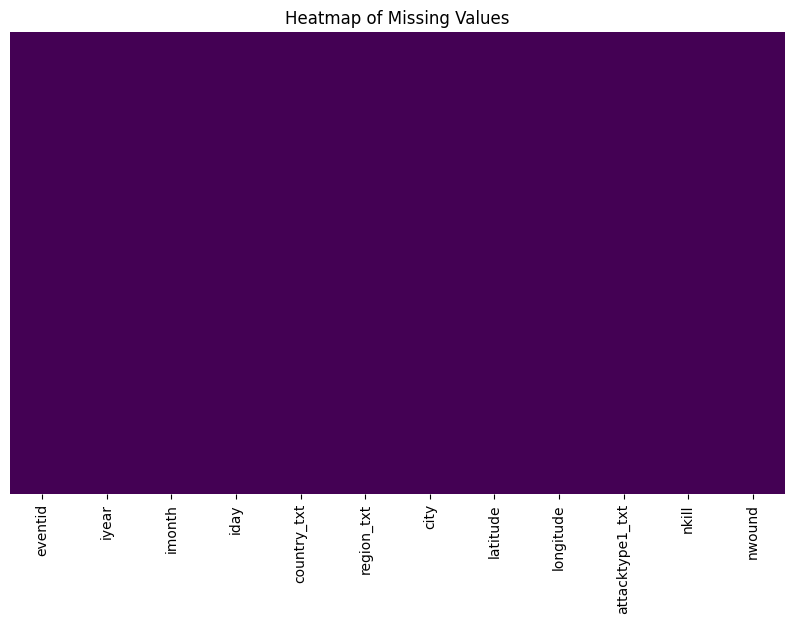

eventid            0
iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
city               0
latitude           0
longitude          0
attacktype1_txt    0
nkill              0
nwound             0
dtype: int64

In [19]:
#Final check for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dff.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()
dff.isna().sum()

In [21]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(dff, geometry=gpd.points_from_xy(dff.longitude, dff.latitude))

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# Show summary statistics of numerical columns
print(gdf.describe())

        eventid  iyear  imonth  iday country_txt                  region_txt  \
0  197002280001   1970       2    28      Jordan  Middle East & North Africa   
1  197003140002   1970       3    14       Egypt  Middle East & North Africa   
2  197003290002   1970       3    29     Lebanon  Middle East & North Africa   
3  197004150001   1970       4    15      Jordan  Middle East & North Africa   
4  197004250001   1970       4    25      Turkey  Middle East & North Africa   

         city   latitude  longitude    attacktype1_txt  nkill  nwound  \
0      Hebron  31.530243  35.094162      Armed Assault    1.0     1.0   
1  Alexandria  31.198056  29.919167  Bombing/Explosion    0.0     2.0   
2      Beirut  33.888523  35.503513  Bombing/Explosion    0.0     0.0   
3       Amman  31.950001  35.933331  Bombing/Explosion    0.0     0.0   
4    Istanbul  41.106178  28.689863  Bombing/Explosion    0.0     0.0   

                    geometry  
0  POINT (35.09416 31.53024)  
1  POINT (29.91917

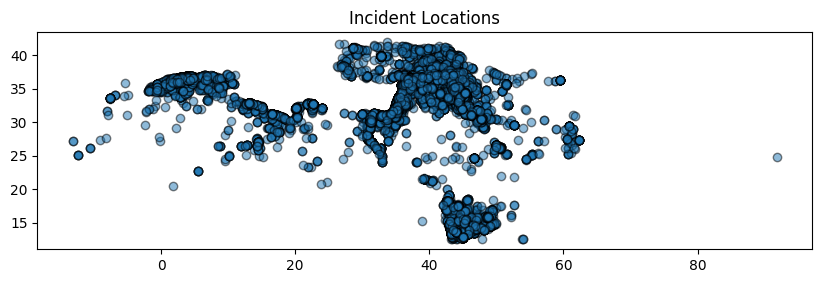

In [22]:
# Create a simple plot of the data using GeoPandas' built-in plotting functionality
gdf.plot(figsize=(10, 6), alpha=0.5, edgecolor='k')
plt.title("Incident Locations")
plt.show()

# Geospatial Visualization

In [26]:
#a) base map with markers for each incident using Folium.
sampled_dff = dff.sample(n=5000, random_state=42)  # Adjust sample size otherwise its crashing since too many rows
base_map = folium.Map(location=[sampled_dff.latitude.mean(), sampled_dff.longitude.mean()], zoom_start=2)

for _, row in sampled_dff.iterrows():
    folium.Marker([row["latitude"], row["longitude"]]).add_to(base_map)

base_map.save("base_map.html")
base_map


In [27]:
# b) Generate a choropleth map using the country_txt column
country_incidents = dff.groupby("country_txt").size().reset_index(name="incident_count")
choropleth_map = folium.Map(location=[dff.latitude.mean(), dff.longitude.mean()], zoom_start=2)

folium.Choropleth(
    geo_data="https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson",  # Online GeoJSON source
    data=country_incidents,
    columns=["country_txt", "incident_count"],
    key_on="feature.properties.ADMIN",  # Match country names
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(choropleth_map)
choropleth_map

In [28]:
# c) Create a heatmap of incidents
heatmap_map = folium.Map(location=[dff.latitude.mean(), dff.longitude.mean()], zoom_start=2)
HeatMap(dff[['latitude', 'longitude']].values, radius=10).add_to(heatmap_map)
heatmap_map

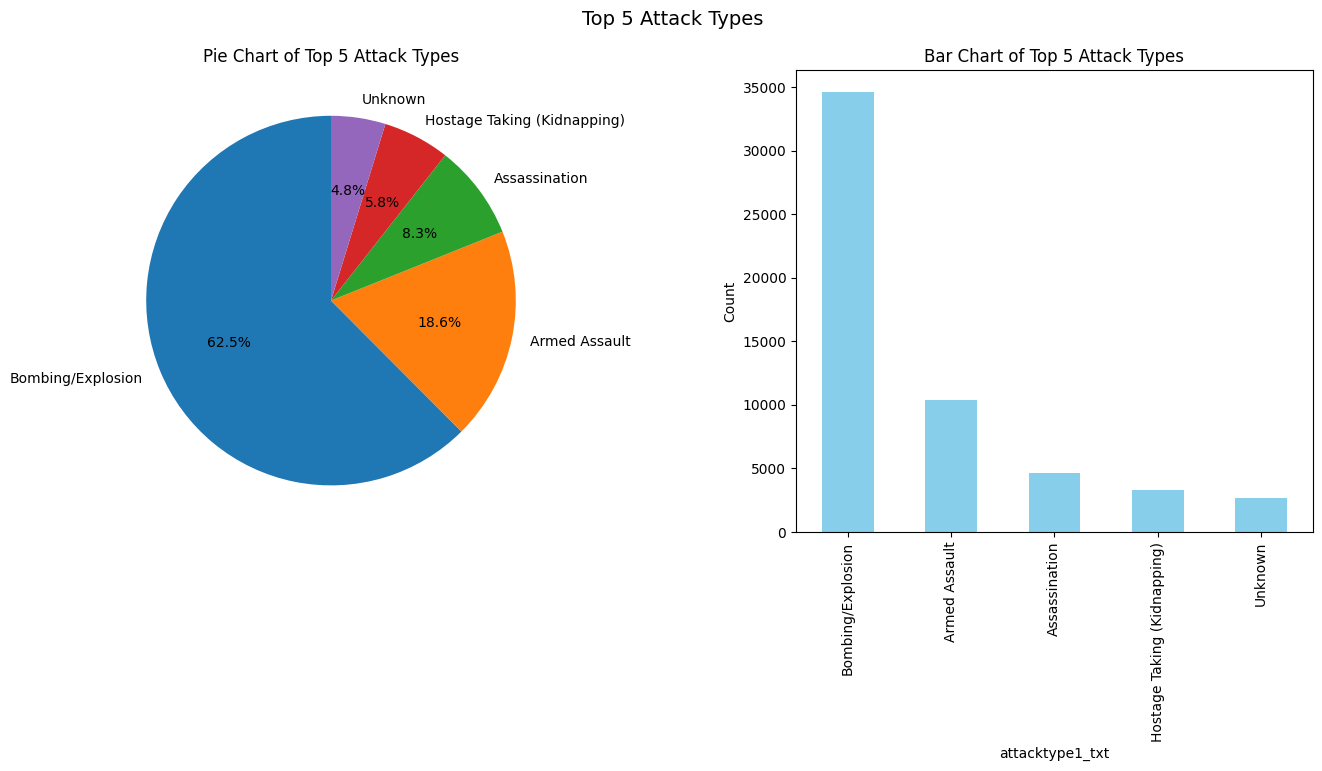

In [29]:
# Attack Type Analysis
attack_counts = dff['attacktype1_txt'].value_counts()

# a) Top 5 attack types visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
attack_counts[:5].plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_ylabel('')
axes[0].set_title("Pie Chart of Top 5 Attack Types")

plt.subplots_adjust(wspace=0.4)
attack_counts[:5].plot.bar(ax=axes[1], color='skyblue')
axes[1].set_ylabel('Count')
axes[1].set_title("Bar Chart of Top 5 Attack Types")
plt.suptitle("Top 5 Attack Types", fontsize=14)
plt.show()

In [30]:
# b) Print out frequency of each attack type
print(attack_counts)

attacktype1_txt
Bombing/Explosion                      34639
Armed Assault                          10320
Assassination                           4610
Hostage Taking (Kidnapping)             3243
Unknown                                 2637
Facility/Infrastructure Attack          1348
Unarmed Assault                          220
Hijacking                                136
Hostage Taking (Barricade Incident)      125
Name: count, dtype: int64


# Time Series Analysis

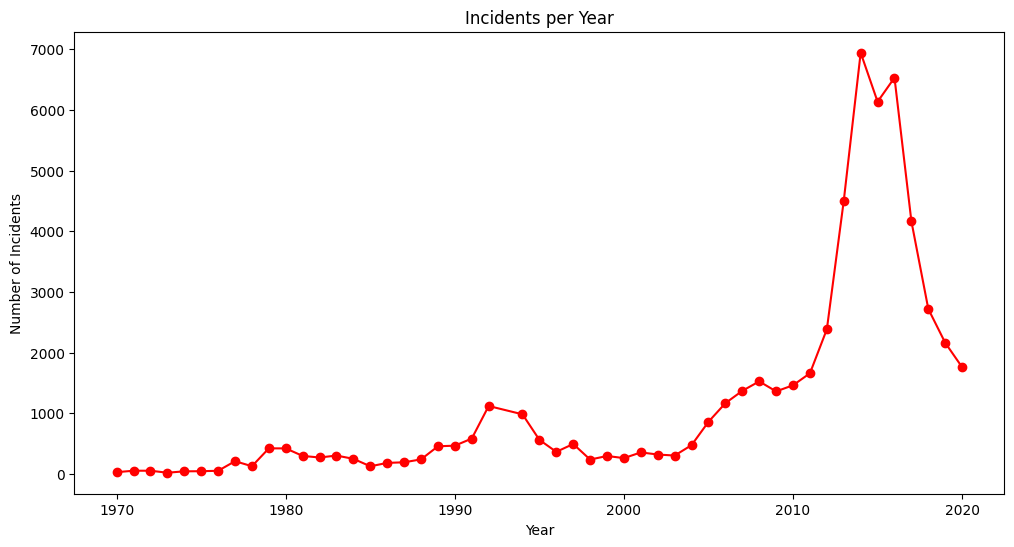

In [40]:
# a) Line plot of incidents per year
time_series = dff.groupby('iyear').size()
time_series.plot(figsize=(12, 6), color='red', title="Incidents per Year", marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

In [33]:
# b) Perform time series decomposition
result = seasonal_decompose(time_series, model='additive', period=10)

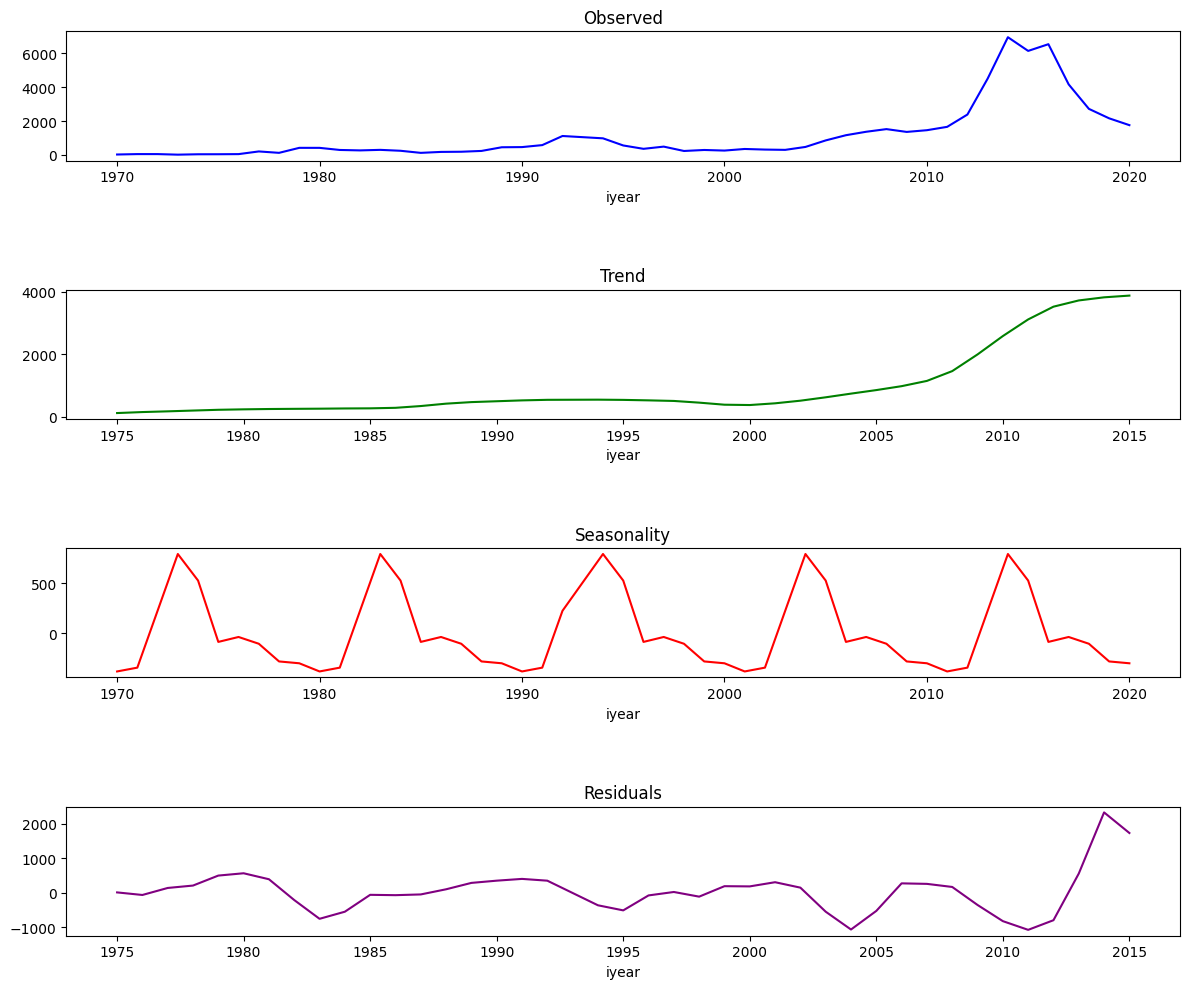

In [34]:
# c) Plot the decomposition results.
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

result.observed.plot(ax=axes[0], color='blue', title="Observed")
result.trend.plot(ax=axes[1], color='green', title="Trend")
result.seasonal.plot(ax=axes[2], color='red', title="Seasonality")
result.resid.plot(ax=axes[3], color='purple', title="Residuals")

plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()

##**Interpretation**

Based on the decomposition plot of the time series data:

1. **Observed Component**:  
   - The overall trend shows a significant increase in incidents starting around the mid-2000s, peaking around 2015, and then declining.  
   - There is a sharp rise and fall, which could indicate an external factor influencing the number of incidents.

2. **Trend Component**:  
   - The trend suggests a gradual increase in incidents from the 1970s, with a more rapid rise after 2000 and a peak around 2015.  
   - This could indicate long-term changes, such as social, economic, or political factors affecting the incidents.

3. **Seasonality Component**:  
   - A repeating pattern is visible over the decade, showing periodic fluctuations in incidents.  
   - This suggests that incidents might follow a seasonal cycle, potentially influenced by annual events or policies.

4. **Residuals Component**:  
   - The residuals fluctuate around zero, with some spikes, indicating variations not captured by the trend or seasonality.  
   - The higher variability in residuals around 2015 suggests that external, unpredictable events may have affected the number of incidents.
